# Analysis of Variation Types in Feature Spaces

## 1. Comparison of Performance of a Traditional Learner in Different Variation Patterns
We try to observe any recurring pattern in terms of performance when variation pattern differs.

a8a full hinge_oco 0.16414566443426154
german full hinge_oco 0.3015
ionosphere full hinge_oco 0.36342857142857143
spambase full hinge_oco 0.23254347826086957
magic04 full hinge_oco 0.2413823019086177

a8a varying_gaussian hinge_oco 0.3267932675361297
german varying_gaussian hinge_oco 0.3967
ionosphere varying_gaussian hinge_oco 0.43028571428571427
spambase varying_gaussian hinge_oco 0.3999891304347826
magic04 varying_gaussian hinge_oco 0.3929649298070351

a8a varying_uniform hinge_oco 0.20134825519915403
german varying_uniform hinge_oco 0.30149999999999993
ionosphere varying_uniform hinge_oco 0.36414285714285716
spambase varying_uniform hinge_oco 0.30427173913043476
magic04 varying_uniform hinge_oco 0.3235133287764867



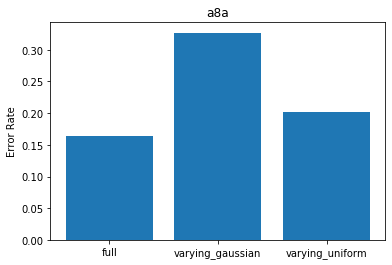

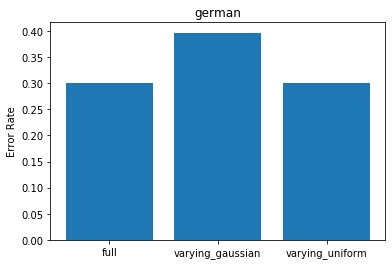

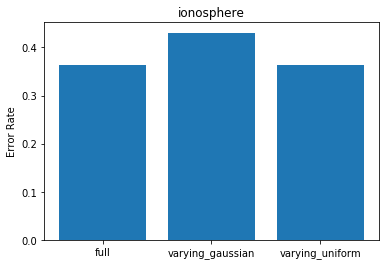

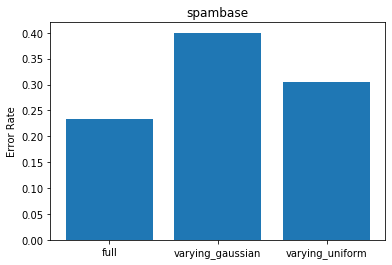

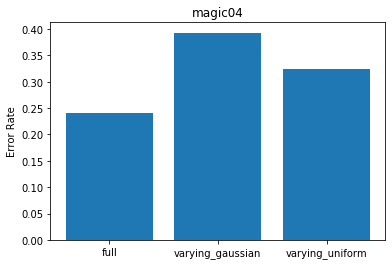

In [38]:
import model
import dataloader as dl
import numpy as np
import trainer
import parameters as p
import copy
import matplotlib.pyplot as plt

datasets = ['a8a', 'german', 'ionosphere', 'spambase', 'magic04']
model_type = 'hinge_oco'


# initialize results dict
results = {}
masks = {}
occurrences = {}

for dataset in datasets:
    results[dataset] = {}
    masks[dataset] = {}
    occurrences[dataset] = {}
    for scenario in p.scenarios:
        results[dataset][scenario] = 0
        masks[dataset][scenario] = []

for scenario in p.scenarios:
    for dataset_name in p.datasets:
        Xpath, ypath = dl.get_path(dataset_name)
        X, y = dl.read_dataset(Xpath, ypath)
        num_features = len(X[0])
        m = p.models[model_type](num_features, p.learning_rate)
        fold_errors, fold_losses, fold_weights, fold_masks = trainer.cross_validation(X, y, m, p.folds, p.scenarios[scenario])
        masks[dataset_name][scenario] = fold_masks
        results[dataset_name][scenario] = np.mean(fold_errors)
        print(dataset_name, scenario, model_type, np.mean(fold_errors))
    print()    
    
    
# plot results for each dataset
for dataset_name in datasets:
    plt.title(dataset_name)
    plt.ylabel('Error Rate')
    plt.bar(results[dataset_name].keys(), results[dataset_name].values())
    plt.show()

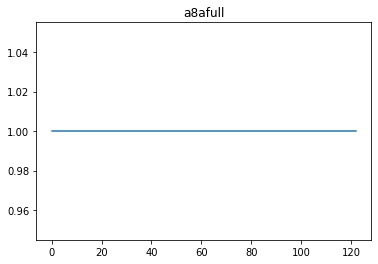

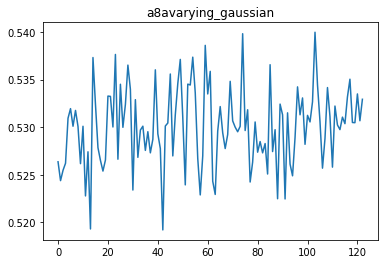

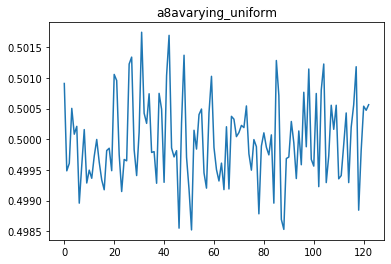

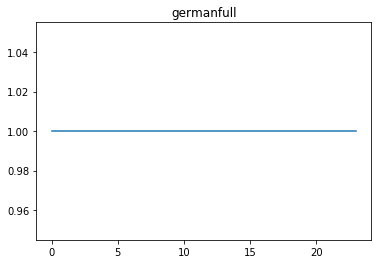

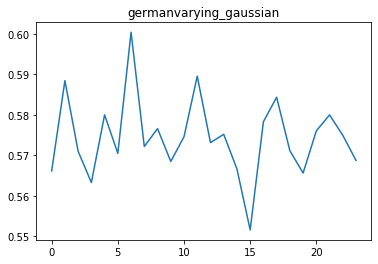

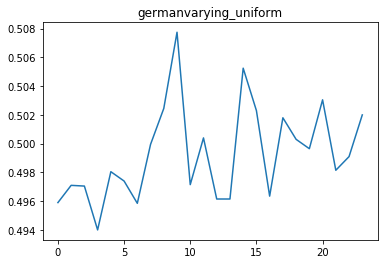

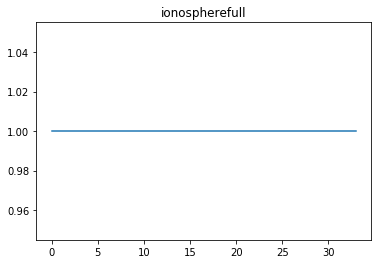

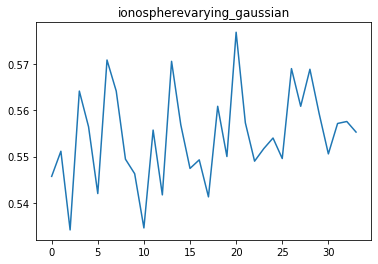

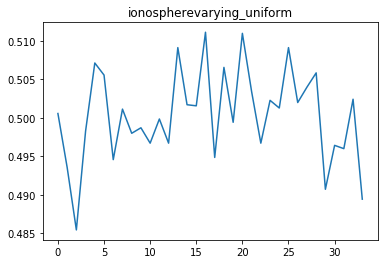

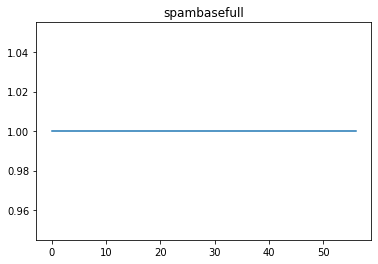

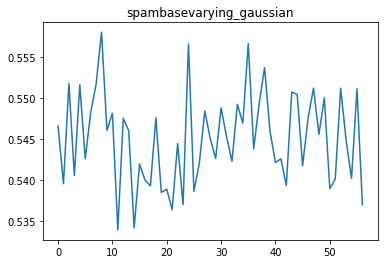

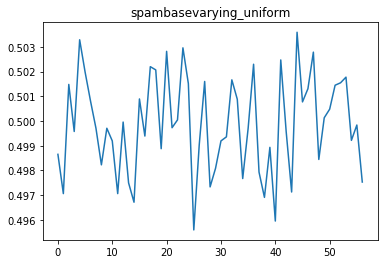

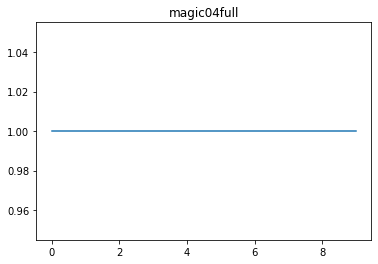

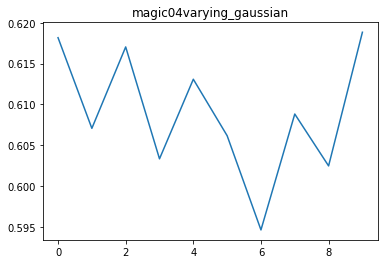

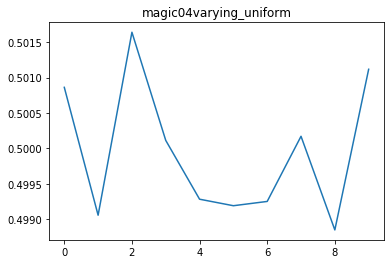

In [45]:
for key in masks:
    for scenario in p.scenarios:
        sum_masks = copy.deepcopy(masks[key][scenario][0])
        for i in range(1, len(masks[key][scenario])):
            sum_masks += masks[key][scenario][i]

        avg_sum_masks =  sum_masks / len(masks[key][scenario])
        avg_sum_masks = np.sum(avg_sum_masks, axis=0) / len(sum_masks)
        occurrences[key][scenario] = avg_sum_masks
        
        plt.title(key + scenario)
        plt.plot(occurrences[key][scenario])
        plt.show()

We observe that the performance of a traditional learner is worse when the feature occurrence distribution is non-uniform. When we plot the average number of occurrence of features (above), we don't see an obvious pattern that hints at the reason behind this difference. Let us now try to look at the co-occurrence of features.